In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

Build a regression model.

In [17]:
# Regression model of number of parks around stations with number of available city bikes

df_cb = pd.read_csv('../data/city_bikes.csv')
df_yelp_POIall = pd.read_csv('../data/yelp_POIall.csv')
df_fsV2all = pd.read_csv('../data/foursquareV2All.csv')

df_res = df_cb.merge(df_fsV2all, how='inner', left_on='id', right_on='bikeStationID')

mask = (df_res['category'].str.contains('Park'))
df = df_res.loc[mask].groupby(['bikeStationID', 'numOfBikesAvail'])['category'].count()
#convert series to data frame
df = df.to_frame().reset_index()
df.info()

y = df['category']
X = df['numOfBikesAvail']
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   bikeStationID    244 non-null    int64
 1   numOfBikesAvail  244 non-null    int64
 2   category         244 non-null    int64
dtypes: int64(3)
memory usage: 5.8 KB


Provide model output and an interpretation of the results. 

In [18]:
print(results.summary())

# NUMBER OF PARKS VS NUMBER OF AVAILABLE CITY BIKES SHOWS A SLIGHT POSITIVE RELATIONSHIP WITH P-VALUES 
# LESS THAN 0.05.

                            OLS Regression Results                            
Dep. Variable:               category   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.476
Date:                Thu, 03 Aug 2023   Prob (F-statistic):             0.0116
Time:                        10:30:48   Log-Likelihood:                -496.52
No. Observations:                 244   AIC:                             997.0
Df Residuals:                     242   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5526      0.203     

In [19]:
# TRY WITHOUT A Y-INTERCEPT
y = df['category']
X = df['numOfBikesAvail']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               category   R-squared (uncentered):                   0.598
Model:                            OLS   Adj. R-squared (uncentered):              0.596
Method:                 Least Squares   F-statistic:                              360.8
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                    6.15e-50
Time:                        10:31:00   Log-Likelihood:                         -596.25
No. Observations:                 244   AIC:                                      1194.
Df Residuals:                     243   BIC:                                      1198.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

##### If the model is not forced to have a y intercept, it gives a decent R-squared. This is reasonable given the scatter plot showing the data being more symmetric around the regression line when it goes through the origin. The numOfBikesAvail coefficient has a low p-value (0.000), therefore, we can will not reject this model. The positive relationship suggests people ride city bikes to go the park since it's quite convenient.

[Text(0.5, 0, 'Number of City Bikes Available'),
 Text(0, 0.5, 'Number of Parks Nearby')]

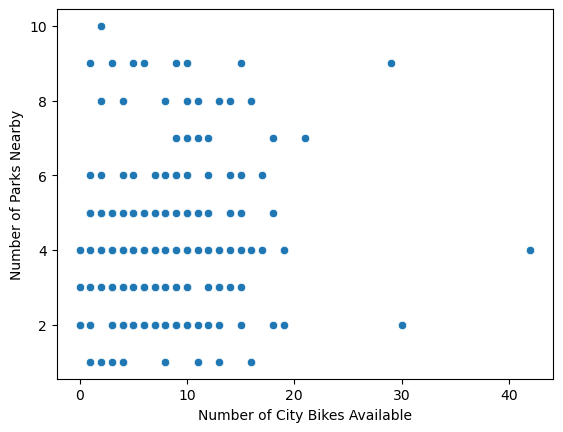

In [22]:
plt = sns.scatterplot(x="numOfBikesAvail", y="category", data=df)
plt.set(xlabel='Number of City Bikes Available', ylabel='Number of Parks Nearby')

# Stretch

How can you turn the regression model into a classification model?